In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definisi variabel input (suhu dan kelembapan)
suhu = ctrl.Antecedent(np.arange(16, 36, 1), 'suhu')  # Rentang suhu dari 16 hingga 35
kelembapan = ctrl.Antecedent(np.arange(20, 81, 1), 'kelembapan')  # Rentang kelembapan dari 20 hingga 80

# Definisi variabel output (kecepatan kipas)
kecepatan_kipas = ctrl.Consequent(np.arange(0, 101, 1), 'kecepatan_kipas')  # Rentang kecepatan kipas dari 0% hingga 100%

# Definisi himpunan fuzzy untuk suhu
suhu['dingin'] = fuzz.trapmf(suhu.universe, [16, 16, 20, 24])  # Trapmf: Fungsi keanggotaan berbentuk trapesium
suhu['sejuk'] = fuzz.trimf(suhu.universe, [20, 24, 28])  # Trimf: Fungsi keanggotaan berbentuk segitiga
suhu['panas'] = fuzz.trapmf(suhu.universe, [24, 28, 36, 36])

# Definisi himpunan fuzzy untuk kelembapan
kelembapan['rendah'] = fuzz.trapmf(kelembapan.universe, [20, 20, 35, 50])
kelembapan['sedang'] = fuzz.trimf(kelembapan.universe, [35, 50, 65])
kelembapan['tinggi'] = fuzz.trapmf(kelembapan.universe, [50, 65, 80, 80])

# Definisi himpunan fuzzy untuk kecepatan kipas
kecepatan_kipas['lambat'] = fuzz.trapmf(kecepatan_kipas.universe, [0, 0, 25, 50])
kecepatan_kipas['sedang'] = fuzz.trimf(kecepatan_kipas.universe, [25, 50, 75])
kecepatan_kipas['cepat'] = fuzz.trapmf(kecepatan_kipas.universe, [50, 75, 100, 100])

# Definisi aturan fuzzy
rule1 = ctrl.Rule(suhu['dingin'] & kelembapan['rendah'], kecepatan_kipas['lambat'])
rule2 = ctrl.Rule(suhu['dingin'] & kelembapan['sedang'], kecepatan_kipas['lambat'])
rule3 = ctrl.Rule(suhu['dingin'] & kelembapan['tinggi'], kecepatan_kipas['sedang'])
rule4 = ctrl.Rule(suhu['sejuk'] & kelembapan['rendah'], kecepatan_kipas['sedang'])
rule5 = ctrl.Rule(suhu['sejuk'] & kelembapan['sedang'], kecepatan_kipas['sedang'])
rule6 = ctrl.Rule(suhu['sejuk'] & kelembapan['tinggi'], kecepatan_kipas['cepat'])
rule7 = ctrl.Rule(suhu['panas'] & kelembapan['rendah'], kecepatan_kipas['cepat'])
rule8 = ctrl.Rule(suhu['panas'] & kelembapan['sedang'], kecepatan_kipas['cepat'])
rule9 = ctrl.Rule(suhu['panas'] & kelembapan['tinggi'], kecepatan_kipas['cepat'])

# Membuat sistem kontrol fuzzy
pengaturan_kipas_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
pengaturan_kipas = ctrl.ControlSystemSimulation(pengaturan_kipas_ctrl)

# Input nilai suhu dan kelembapan
pengaturan_kipas.input['suhu'] = 30  # Input suhu (derajat Celsius)
pengaturan_kipas.input['kelembapan'] = 60  # Input kelembapan (persen)

# Proses inferensi
pengaturan_kipas.compute()

# Output kecepatan kipas
print(f"Kecepatan kipas: {pengaturan_kipas.output['kecepatan_kipas']:.2f}%")


Kecepatan kipas: 78.89%


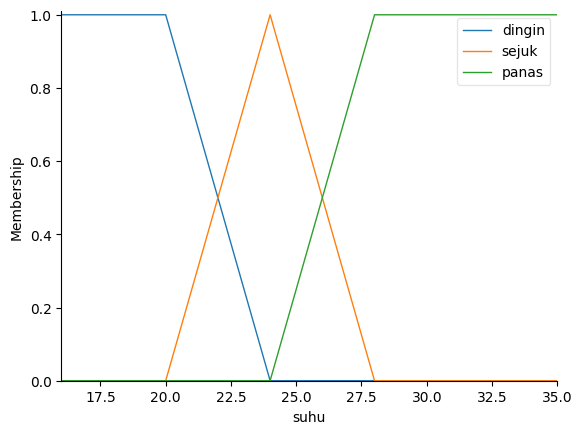

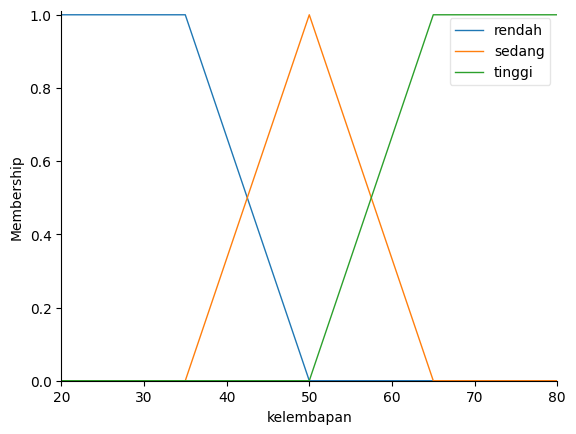

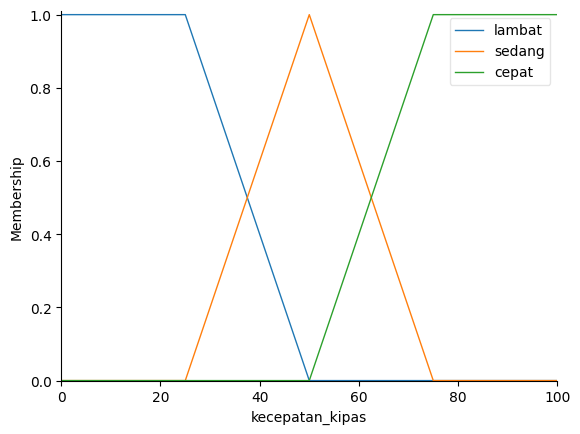

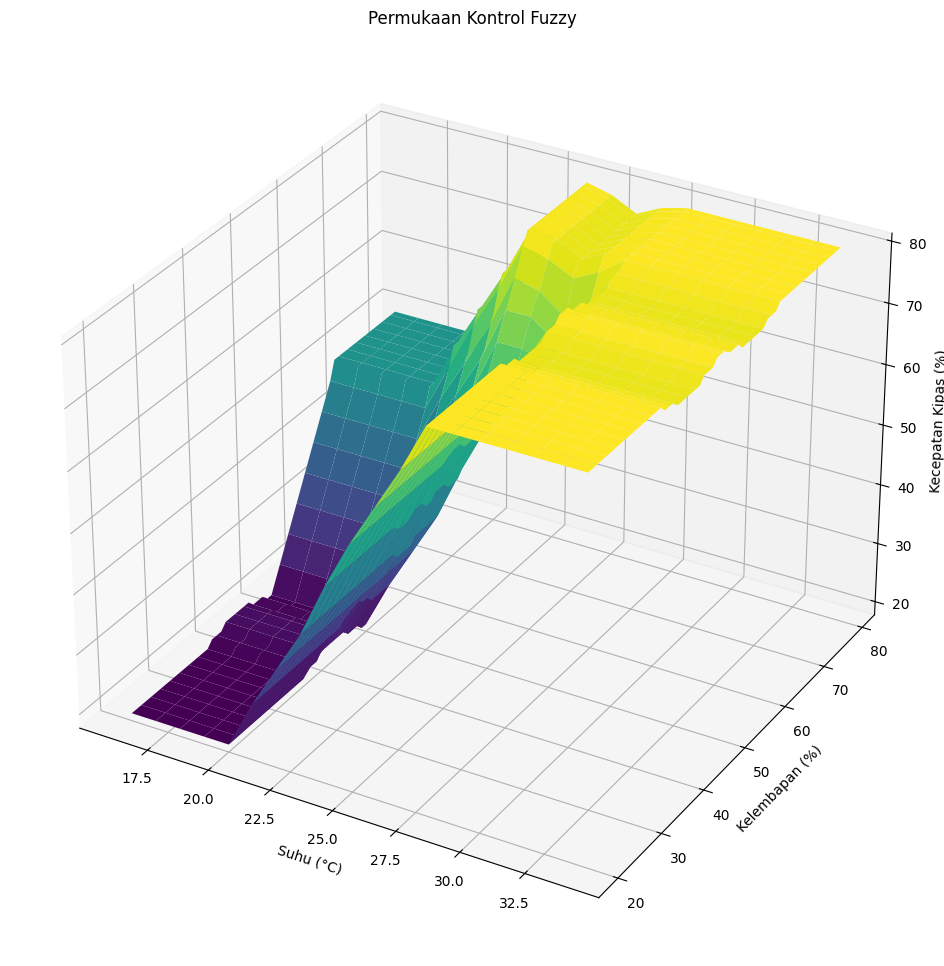

In [9]:
!pip install scikit-fuzzy matplotlib
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# ... (kode sebelumnya tetap sama) ...

# --- Visualisasi Kurva ---
suhu.view()
kelembapan.view()
kecepatan_kipas.view()

# Visualisasi permukaan kontrol 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Generate surface plot
x_suhu = np.arange(suhu.universe.min(), suhu.universe.max(), 1)
y_kelembapan = np.arange(kelembapan.universe.min(), kelembapan.universe.max(), 1)
x_suhu, y_kelembapan = np.meshgrid(x_suhu, y_kelembapan)

z_kecepatan_kipas = np.zeros_like(x_suhu)

for i in range(x_suhu.shape[0]):
    for j in range(x_suhu.shape[1]):
        pengaturan_kipas.input['suhu'] = x_suhu[i, j]
        pengaturan_kipas.input['kelembapan'] = y_kelembapan[i, j]
        pengaturan_kipas.compute()
        z_kecepatan_kipas[i, j] = pengaturan_kipas.output['kecepatan_kipas']

ax.plot_surface(x_suhu, y_kelembapan, z_kecepatan_kipas, cmap='viridis')

ax.set_xlabel('Suhu (°C)')
ax.set_ylabel('Kelembapan (%)')
ax.set_zlabel('Kecepatan Kipas (%)')
ax.set_title('Permukaan Kontrol Fuzzy')

plt.show()

